In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')


In [2]:
import matplotlib.pyplot as plt  
import numpy as np
import pandas as pd
import datetime as dt

 # Reflect Tables into SQLAlchemy ORM

In [3]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()


# reflect the tables
base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = base.classes.measurement
station= base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

In [9]:
 # Find the most recent date in the data set
recent_date = engine.execute('select date from measurement order by date desc limit 1').fetchall()
recent_date

[('2017-08-23',)]

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
year = engine.execute("select date from measurement where date > '2016-08-23'").fetchall()


In [11]:
# Perform a query to retrieve the data and precipitation scores
prcpdate = engine.execute("select date,prcp from measurement where date > '2016-08-23'").fetchall()
# Save the query results as a Pandas DataFrame and set the index to the date column
prcpdf = pd.DataFrame(prcpdate).set_index(0)
prcpdf.index.names = ['Date']
prcpdf.columns = ["Precipitation"]
prcpdf = prcpdf.dropna()


Text(0.5, 1.0, 'Last Year Precipitation with NAs dropped')

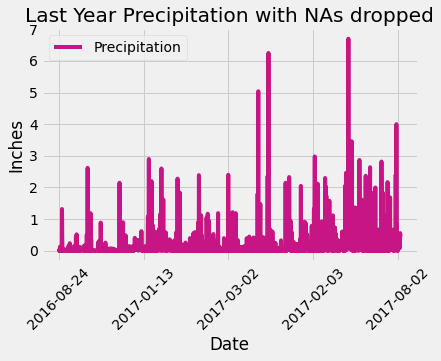

In [12]:

prcpdf.plot(rot = 45,color = "mediumvioletred")
plt.ylabel('Inches')
plt.xlabel('Date')
plt.title('Last Year Precipitation with NAs dropped')

In [13]:
 # Use Pandas to calcualte the summary statistics for the precipitation data
prcpdf.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


#  Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
cnt = engine.execute("select count(*) from station").fetchall()
cnt=cnt[0][0]
cnt

9

In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?
# List the stations and the counts in descending order.
activestation = engine.execute("select count(station),station from measurement group by station order by count(station) desc").fetchall()
activestation

[(2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2709, 'USC00513117'),
 (2669, 'USC00519523'),
 (2612, 'USC00516128'),
 (2202, 'USC00514830'),
 (1979, 'USC00511918'),
 (1372, 'USC00517948'),
 (511, 'USC00518838')]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
highest_station = engine.execute("select station, min(tobs), max(tobs), avg(tobs) from measurement where station = 'USC00519281'").fetchall()
highest_station

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_highest_station = engine.execute("select date, tobs from measurement where station ='USC00519281' and date > '2016-08-23'").fetchall()
year_highest_station = pd.DataFrame(year_highest_station).set_index(0)
year_highest_station.index.names = ["Dates"]
year_highest_station.columns = ["Temp"]


Text(0.5, 0, 'Temperature')

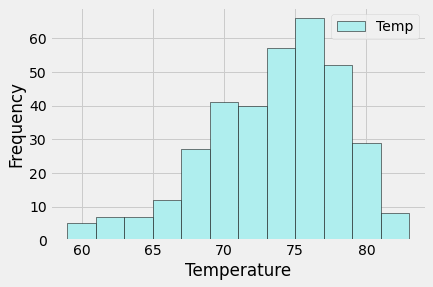

In [18]:
year_highest_station.plot.hist(bins=12, edgecolor = "black", color= "paleturquoise")
plt.xlabel("Temperature")

# Close Session

In [19]:
session.close()